In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys, platform, os
import matplotlib
from matplotlib import pyplot as plt
font = {'size': 16}
matplotlib.rc('font', **font)
matplotlib.rc('text',usetex=True)
import numpy as np
import camb
from camb import model, initialpower
import getdist
from getdist import plots, MCSamples
print('Using CAMB %s installed at %s'%(camb.__version__,os.path.dirname(camb.__file__)))

Using CAMB 1.5.4 installed at /Users/amk/Library/CloudStorage/OneDrive-SwanseaUniversity/Codes/QuintessenceAS/CAMB_Q/camb


In [2]:
def fn_BAO_lambda(zn, lambd):
        pars = camb.set_params(ombh2=0.0222, omch2=0.1195,  omk=0.0023,
                           n=lambd, adj_om = True, V0= 1e-8,
                           dark_energy_model='EarlyQuintessenceAS', H0=67.7)
    
        results = camb.get_results(pars);
        rs = results.sound_horizon(1100)
        d_A =results.angular_diameter_distance(zn) 
        h = results.h_of_z(zn)
        d_V = ((zn*(1+zn)**2*d_A**2)/h)**(1/3)
        fn = rs/d_V
        return fn

In [3]:
def fn_BAO_H0(zn, H0):
        pars = camb.set_params(ombh2=0.0222, omch2=0.1195,  omk=0.0023,
                           n= 0.48, adj_om = True, V0= 1e-8,
                           dark_energy_model='EarlyQuintessenceAS', H0=H0)
    
        results = camb.get_results(pars);
        rs = results.sound_horizon(1100)
        d_A =results.angular_diameter_distance(zn) 
        h = results.h_of_z(zn)
        d_V = ((zn*(1+zn)**2*d_A**2)/h)**(1/3)
        fn = rs/d_V
        return fn

In [4]:
def fn_BAO_omegab(zn, omega):
        pars = camb.set_params(ombh2=omega, omch2=0.1195,  omk=0.0023,
                           n= 0.48, adj_om = True, V0= 1e-8,
                           dark_energy_model='EarlyQuintessenceAS', H0=67.7)
    
        results = camb.get_results(pars);
        rs = results.sound_horizon(1100)
        d_A =results.angular_diameter_distance(zn) 
        h = results.h_of_z(zn)
        d_V = ((zn*(1+zn)**2*d_A**2)/h)**(1/3)
        fn = rs/d_V
        return fn

In [5]:
def fn_BAO_omegac(zn, omega):
        pars = camb.set_params(ombh2=0.0222, omch2=omega,  omk=0.0023,
                           n= 0.48, adj_om = True, V0= 1e-8,
                           dark_energy_model='EarlyQuintessenceAS', H0=67.7)
    
        results = camb.get_results(pars);
        rs = results.sound_horizon(1100)
        d_A =results.angular_diameter_distance(zn) 
        h = results.h_of_z(zn)
        d_V = ((zn*(1+zn)**2*d_A**2)/h)**(1/3)
        fn = rs/d_V
        return fn

In [6]:
def der_lambda(zn, lambd, step):
    lambda_u = lambd+step
    lambda_l = lambd-step
    fn_u = fn_BAO_lambda(zn, lambda_u)
    fn_l = fn_BAO_lambda(zn, lambda_l)
    der = (fn_u-fn_l)/(2*step)
    return der

In [7]:
def der_H0(zn, H0, step):
    H0_u = H0+step
    H0_l = H0-step
    fn_u = fn_BAO_H0(zn, H0_u)
    fn_l = fn_BAO_H0(zn, H0_l)
    der = (fn_u-fn_l)/(2*step)
    return der

In [8]:
def der_omegab(zn, omega, step):
    omega_u = omega+step
    omega_l = omega-step
    fn_u = fn_BAO_omegab(zn, omega_u)
    fn_l = fn_BAO_omegab(zn, omega_l)
    der = (fn_u-fn_l)/(2*step)
    return der

In [9]:
def der_omegac(zn, omega, step):
    omega_u = omega+step
    omega_l = omega-step
    fn_u = fn_BAO_omegac(zn, omega_u)
    fn_l = fn_BAO_omegac(zn, omega_l)
    der = (fn_u-fn_l)/(2*step)
    return der

In [10]:
s_CMB = [0.34,2.4,0.000135,0.00127]
F_CMB = np.zeros((4,4))
for i in range(len(s_CMB)):
    F_CMB[i,i] = 1/s_CMB[i]**2

In [11]:
steps = [0.001, 0.01, 0.0008, 0.003]
params = [0.48, 67.7, 0.0222, 0.1195]

DESI

In [12]:
zn = [0.106,0.15,0.32,0.57,0.15,0.25,0.35,0.45,0.55,0.65,0.75,0.85,
      0.95,1.05,1.15,1.25,1.35,1.45,1.55,1.65,.75,1.85]
zn = np.array(zn)
s_BAO=[0.0084,0.015,0.0023,0.0071,0.0041,0.0017,0.0088,0.0055,0.0038,0.0028,0.0021,
       0.0018,0.0018,0.0017,0.0016,0.0014,0.0015,0.0016,0.0019,0.0028,0.0041,0.0052]
s_BAO = np.array(s_BAO)

In [13]:
ders_lambda = der_lambda(zn, params[0], steps[0])
ders_lambda = np.array(ders_lambda)
ders_H0 = der_H0(zn, params[1], steps[1])
ders_H0 = np.array(ders_H0)
ders_omegab = der_omegab(zn, params[2], steps[2])
ders_omegab = np.array(ders_omegab)
ders_omegac = der_omegac(zn, params[3], steps[3])
ders_omegac = np.array(ders_omegac)
ders = np.stack((ders_lambda, ders_H0, ders_omegab, ders_omegac))
F_BAO = np.zeros((len(ders), len(ders)))
for i in range(len(ders)):
    for j in range(len(ders)):
        F_BAO[i,j] = np.sum(1/(s_BAO**2)*ders[i]*ders[j])

CAMBUnknownArgumentError: Unrecognized parameter: adj_om

In [ ]:
nsamp  = int(1e6)
names  = ['lambda','H_0','Omega_b','Omega_c']

labels = [r'\lambda',r'H_0',r'\Omega_b',r'\Omega_c']

mean  = np.array((0.48, 67.7, 0.0222, 0.1195))

#covm_CMB = np.linalg.inv((F_CMB))
#samps_CMB  = np.random.multivariate_normal(mean_CMB , covm_CMB , size=nsamp )
#samples_CMB  = MCSamples(samples=samps_CMB, names =names_CMB, labels=labels_CMB, label='CMB')

covm_CMB_BAO = np.linalg.inv((F_BAO+F_CMB))
samps_CMB_BAO  = np.random.multivariate_normal(mean , covm_CMB_BAO , size=nsamp )
samples_CMB_BAO  = MCSamples(samples=samps_CMB_BAO, names =names, labels=labels, label='BAO')
print([samples_CMB_BAO.getInlineLatex(name,limit=1) for name in names])

Removed no burn in
['\\lambda = 0.48\\pm 0.32', 'H_0 = 67.70\\pm 0.71', '\\Omega_b = 0.02220\\pm 0.00014', '\\Omega_c = 0.1195\\pm 0.0013']


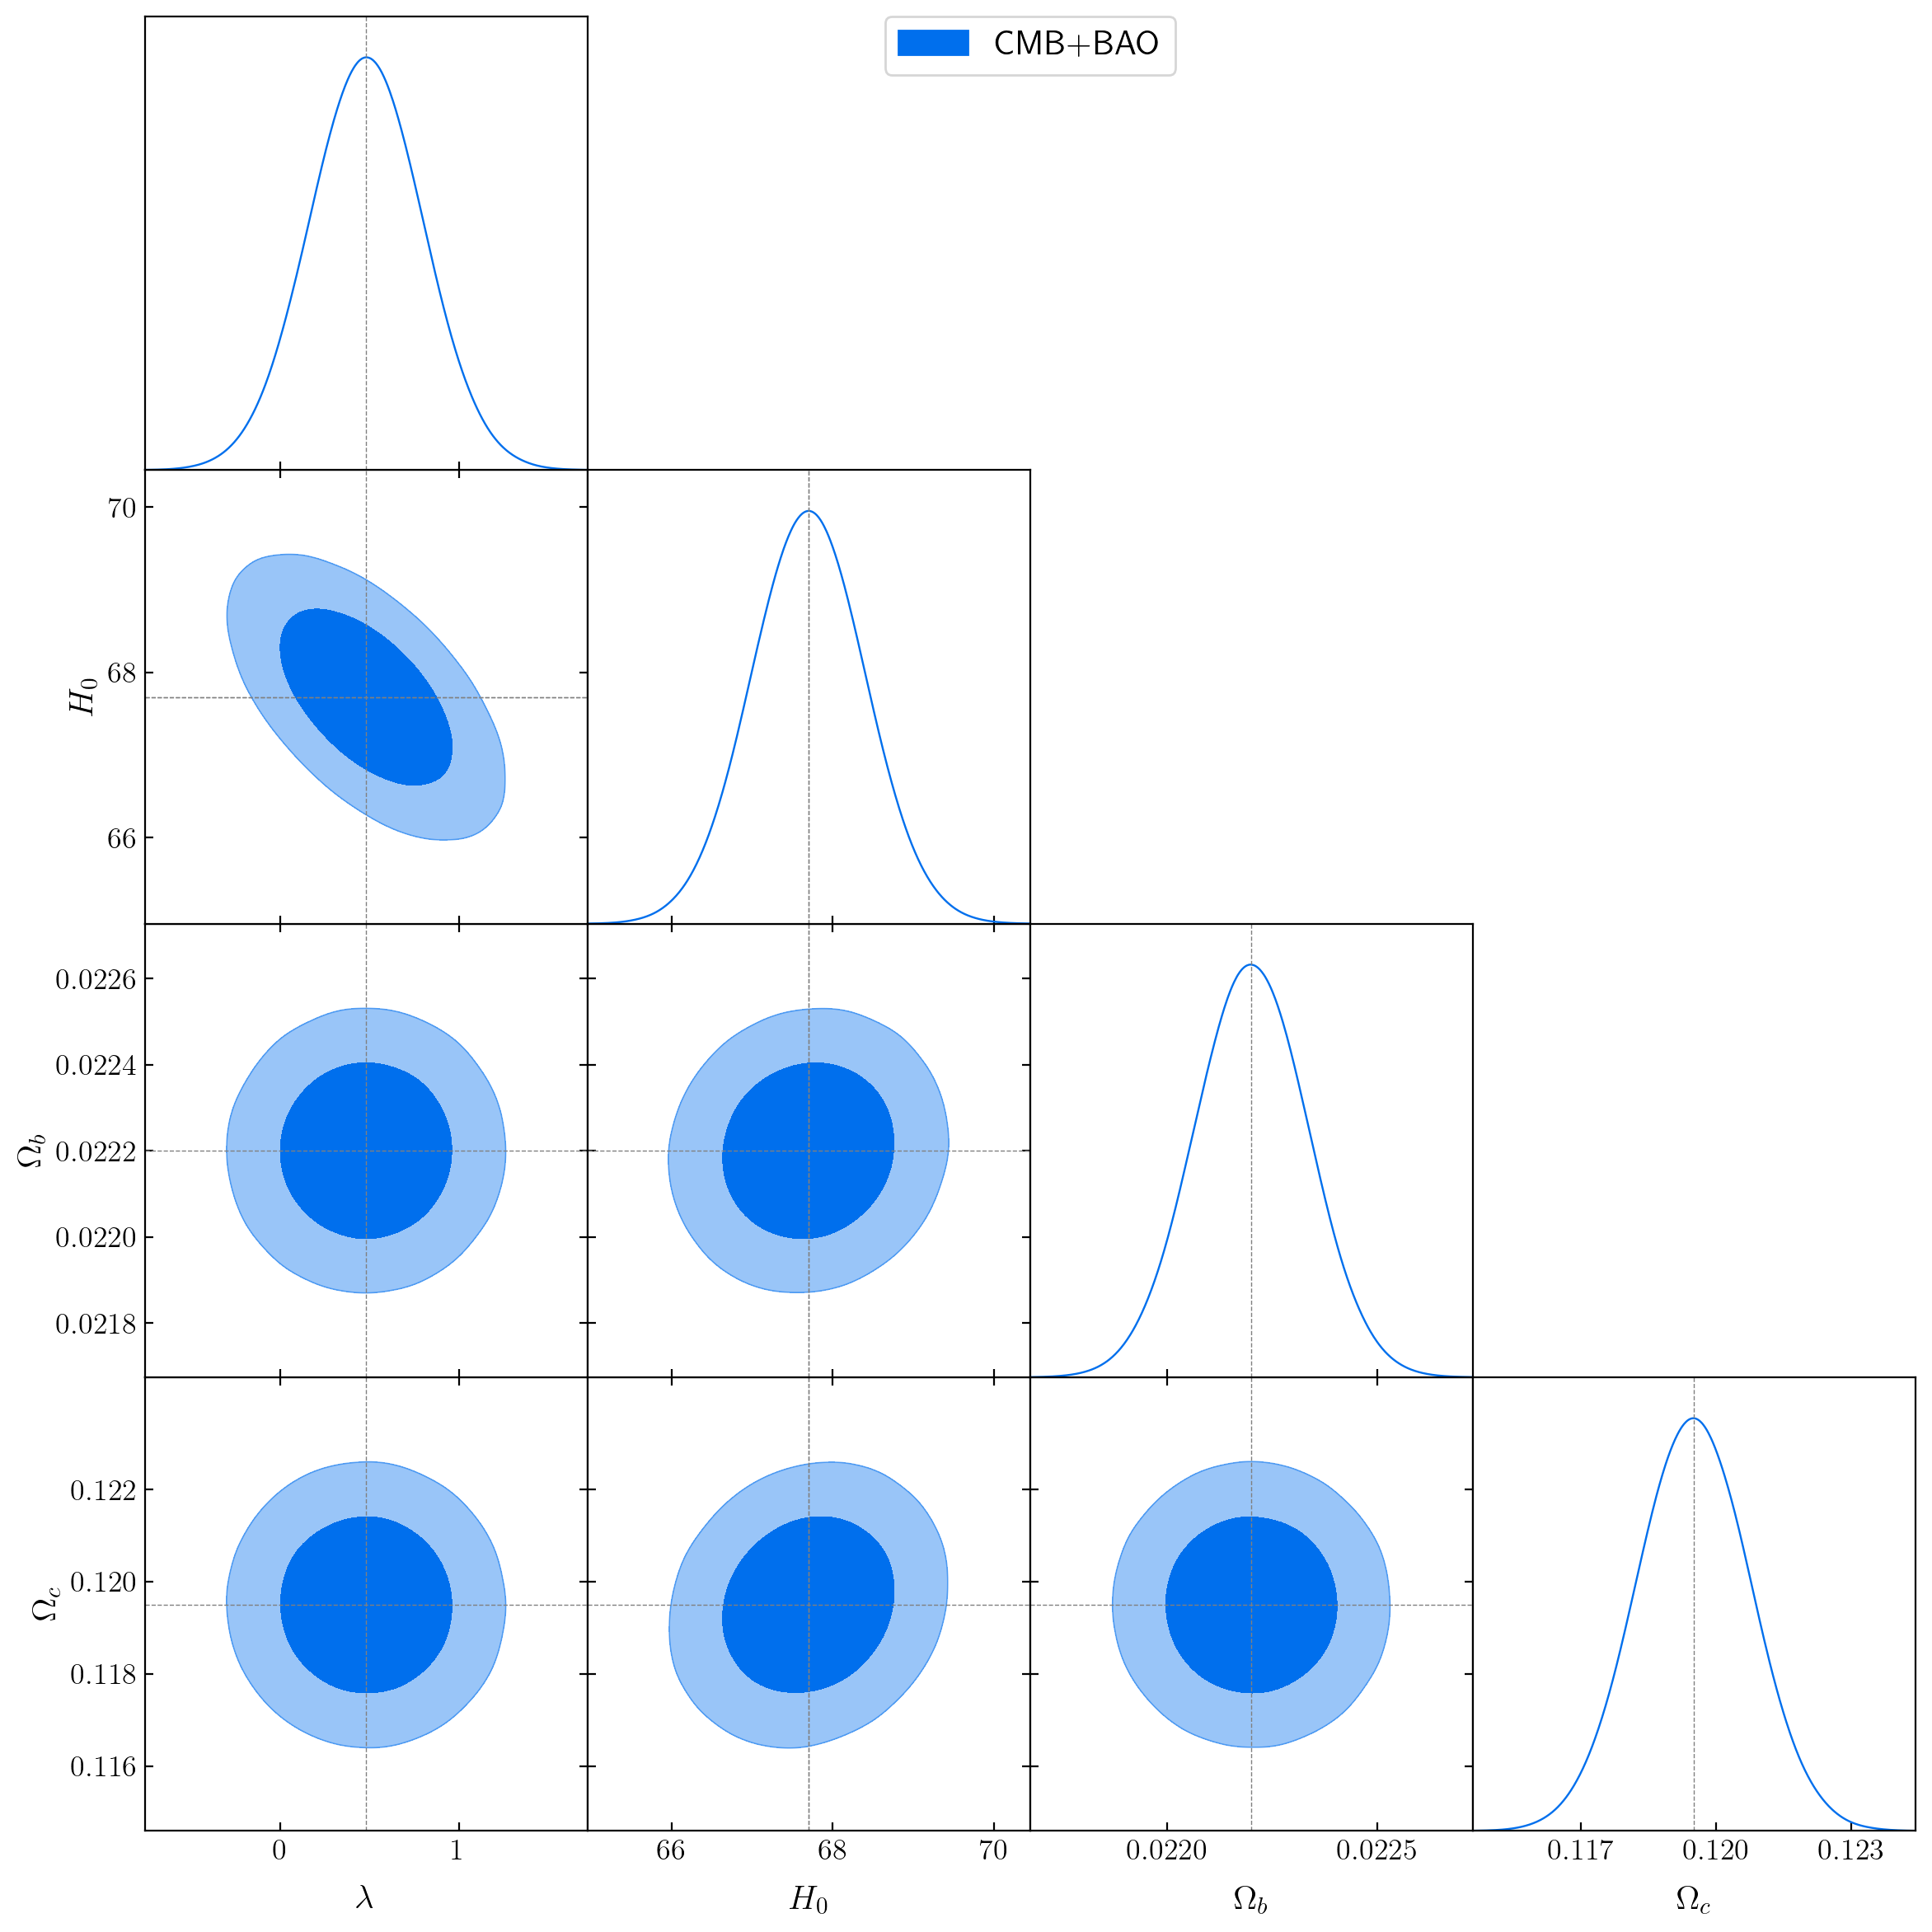

In [ ]:
g = plots.get_subplot_plotter(subplot_size=3)
g.settings.axes_fontsize=14
g.settings.legend_fontsize=16
g.settings.axes_labelsize=16
g.triangle_plot([samples_CMB_BAO ],filled=True, markers={r'\lambda':mean[0],r'H_0':mean[1],r'\Omega_b':mean[2],r'\Omega_c':mean[3]}, legend_labels=['CMB+BAO'])
markers={'lambda':mean[0],'H_0':mean[1],'Omega_b':mean[2],'Omega_c':mean[3]}
g.add_param_markers(markers)

uncertainty conversion

In [ ]:
pars = camb.set_params(ombh2=0.0222, omch2=0.1197, omk=0.0, H0=67.5, mnu= 0.06, tau=0.078, ns=0.9655, As=2.196e-9)
results = camb.get_results(pars);
zn = [0.15,0.25,0.35,0.45,0.55,0.65,0.75,0.85,
      0.95,1.05,1.15,1.25,1.35,1.45,1.55,1.65,1.75,1.85]
zn = np.array(zn)
s_DA = [0.0278, 0.0187, 0.0145, 0.0119, 0.0101, 0.0087, 0.0077, 0.0076, 0.0088, 0.0091, 0.0091, 0.0091,
        0.0100, 0.0117, 0.015, 0.0236, 0.0362, 0.0479]
s_DA = np.array(s_DA)     #sigma(DA/rs)/(DA/rs)
rs = results.sound_horizon(1100)
DA =results.angular_diameter_distance(zn)
h = results.h_of_z(zn)
s_H = [0.0534, 0.0351, 0.0269, 0.022, 0.0185, 0.016, 0.0141, 0.0135, 0.0142, 
       0.0141, 0.0138, 0.0136, 0.0146, 0.0166, 0.0204, 0.0315, 0.0487, 0.0655]
s_H = np.array(s_H)     #sigma(H*rs)/(H*rs)
sH = s_H*(h*rs)      #sigma(H*rs)
sDA = s_DA*(DA/rs)    #sigma(DA/rs)
dV_rs = ((zn*(1+zn)**2*(DA/rs)**2)/(h*rs))**(1/3) #dV/rs
fn = dV_rs**(-1)         #fn = rs/dV
s_fn = np.sqrt((-2/(3*(DA/rs)*dV_rs)*sDA)**2+(1/(3*(h*rs)*dV_rs)*sH)**2) #sqrt((der of fn wrt (DA/rs) * sigma(DA/rs))^2 + (der of fn wrt (H*rs) * sigma(H*rs))^2)
print(s_fn)

[0.00582863 0.00241106 0.00137817 0.00091226 0.00065557 0.00049762
 0.00039599 0.00035353 0.00036552 0.00034956 0.00032854 0.00031176
 0.00032599 0.0003641  0.0004456  0.00067689 0.00101376 0.00131659]


Euclid

In [ ]:
pars = camb.set_params(ombh2=0.0222, omch2=0.1195,  omk=0.0023,
                   n=0.48, adj_om = True, V0= 1e-8,
                   dark_energy_model='EarlyQuintessenceAS', H0=67.7)
results = camb.get_results(pars);
zn = [0.65,0.75,0.85,0.95,1.05,1.15,1.25,1.35,1.45,1.55,1.65,1.75,1.85,1.95,2.05]
zn = np.array(zn)
s_DA = [0.0123, 0.0083, 0.0074, 0.0071, 0.007, 0.007, 0.007, 0.0073, 0.0078, 0.0087, 0.0101, 0.0123,
        0.0161, 0.0232, 0.0532]
s_DA = np.array(s_DA)
s_H = [0.0189, 0.0142, 0.0127, 0.0119, 0.0114, 0.0112, 0.0110, 0.0111, 0.0116, 
       0.0124, 0.0140, 0.0164, 0.0207, 0.0290, 0.0639]
s_H = np.array(s_H)
rs = results.sound_horizon(1100)
DA =results.angular_diameter_distance(zn)
h = results.h_of_z(zn)
sH = s_H*h*rs
sDA = s_DA*DA/rs
dV_rs = ((zn*(1+zn)**2*(DA/rs)**2)/(h*rs))**(1/3)
fn = dV_rs**(-1) 
s_fn = np.sqrt((-2/(3*DA/rs*dV_rs)*sDA)**2+(1/(3*h*rs*dV_rs)*sH)**2)
print(s_fn)

[0.00065807 0.0004174  0.00034162 0.00030158 0.000276   0.00025959
 0.00024586 0.00024293 0.00024816 0.00026393 0.00029477 0.00034532
 0.0004365  0.00061049 0.00135756]


In [ ]:
steps = [0.001, 0.01, 0.0008, 0.003]
params = [0.48, 67.7, 0.0222, 0.1195]

In [ ]:
ders_lambda = der_lambda(zn, params[0], steps[0])
ders_lambda = np.array(ders_lambda)
ders_H0 = der_H0(zn, params[1], steps[1])
ders_H0 = np.array(ders_H0)
ders_omegab = der_omegab(zn, params[2], steps[2])
ders_omegab = np.array(ders_omegab)
ders_omegac = der_omegac(zn, params[3], steps[3])
ders_omegac = np.array(ders_omegac)
ders = np.stack((ders_lambda, ders_H0, ders_omegab, ders_omegac))
F_BAO = np.zeros((len(ders), len(ders)))
for i in range(len(ders)):
    for j in range(len(ders)):
        F_BAO[i,j] = np.sum(1/(s_fn**2)*ders[i]*ders[j])

In [ ]:
nsamp  = int(1e6)
names  = ['lambda','H_0','Omega_b','Omega_c']

labels = [r'\lambda',r'H_0',r'\Omega_b',r'\Omega_c']

mean  = np.array((0.48, 67.7, 0.0222, 0.1195))

covm_CMB_BAO = np.linalg.inv((F_BAO+F_CMB))
samps_CMB_BAO  = np.random.multivariate_normal(mean , covm_CMB_BAO , size=nsamp )
samples_CMB_BAO  = MCSamples(samples=samps_CMB_BAO, names =names, labels=labels, label='BAO')
print([samples_CMB_BAO.getInlineLatex(name,limit=1) for name in names])

Removed no burn in
['\\lambda = 0.48\\pm 0.32', 'H_0 = 67.70\\pm 0.82', '\\Omega_b = 0.02220\\pm 0.00013', '\\Omega_c = 0.1195\\pm 0.0013']


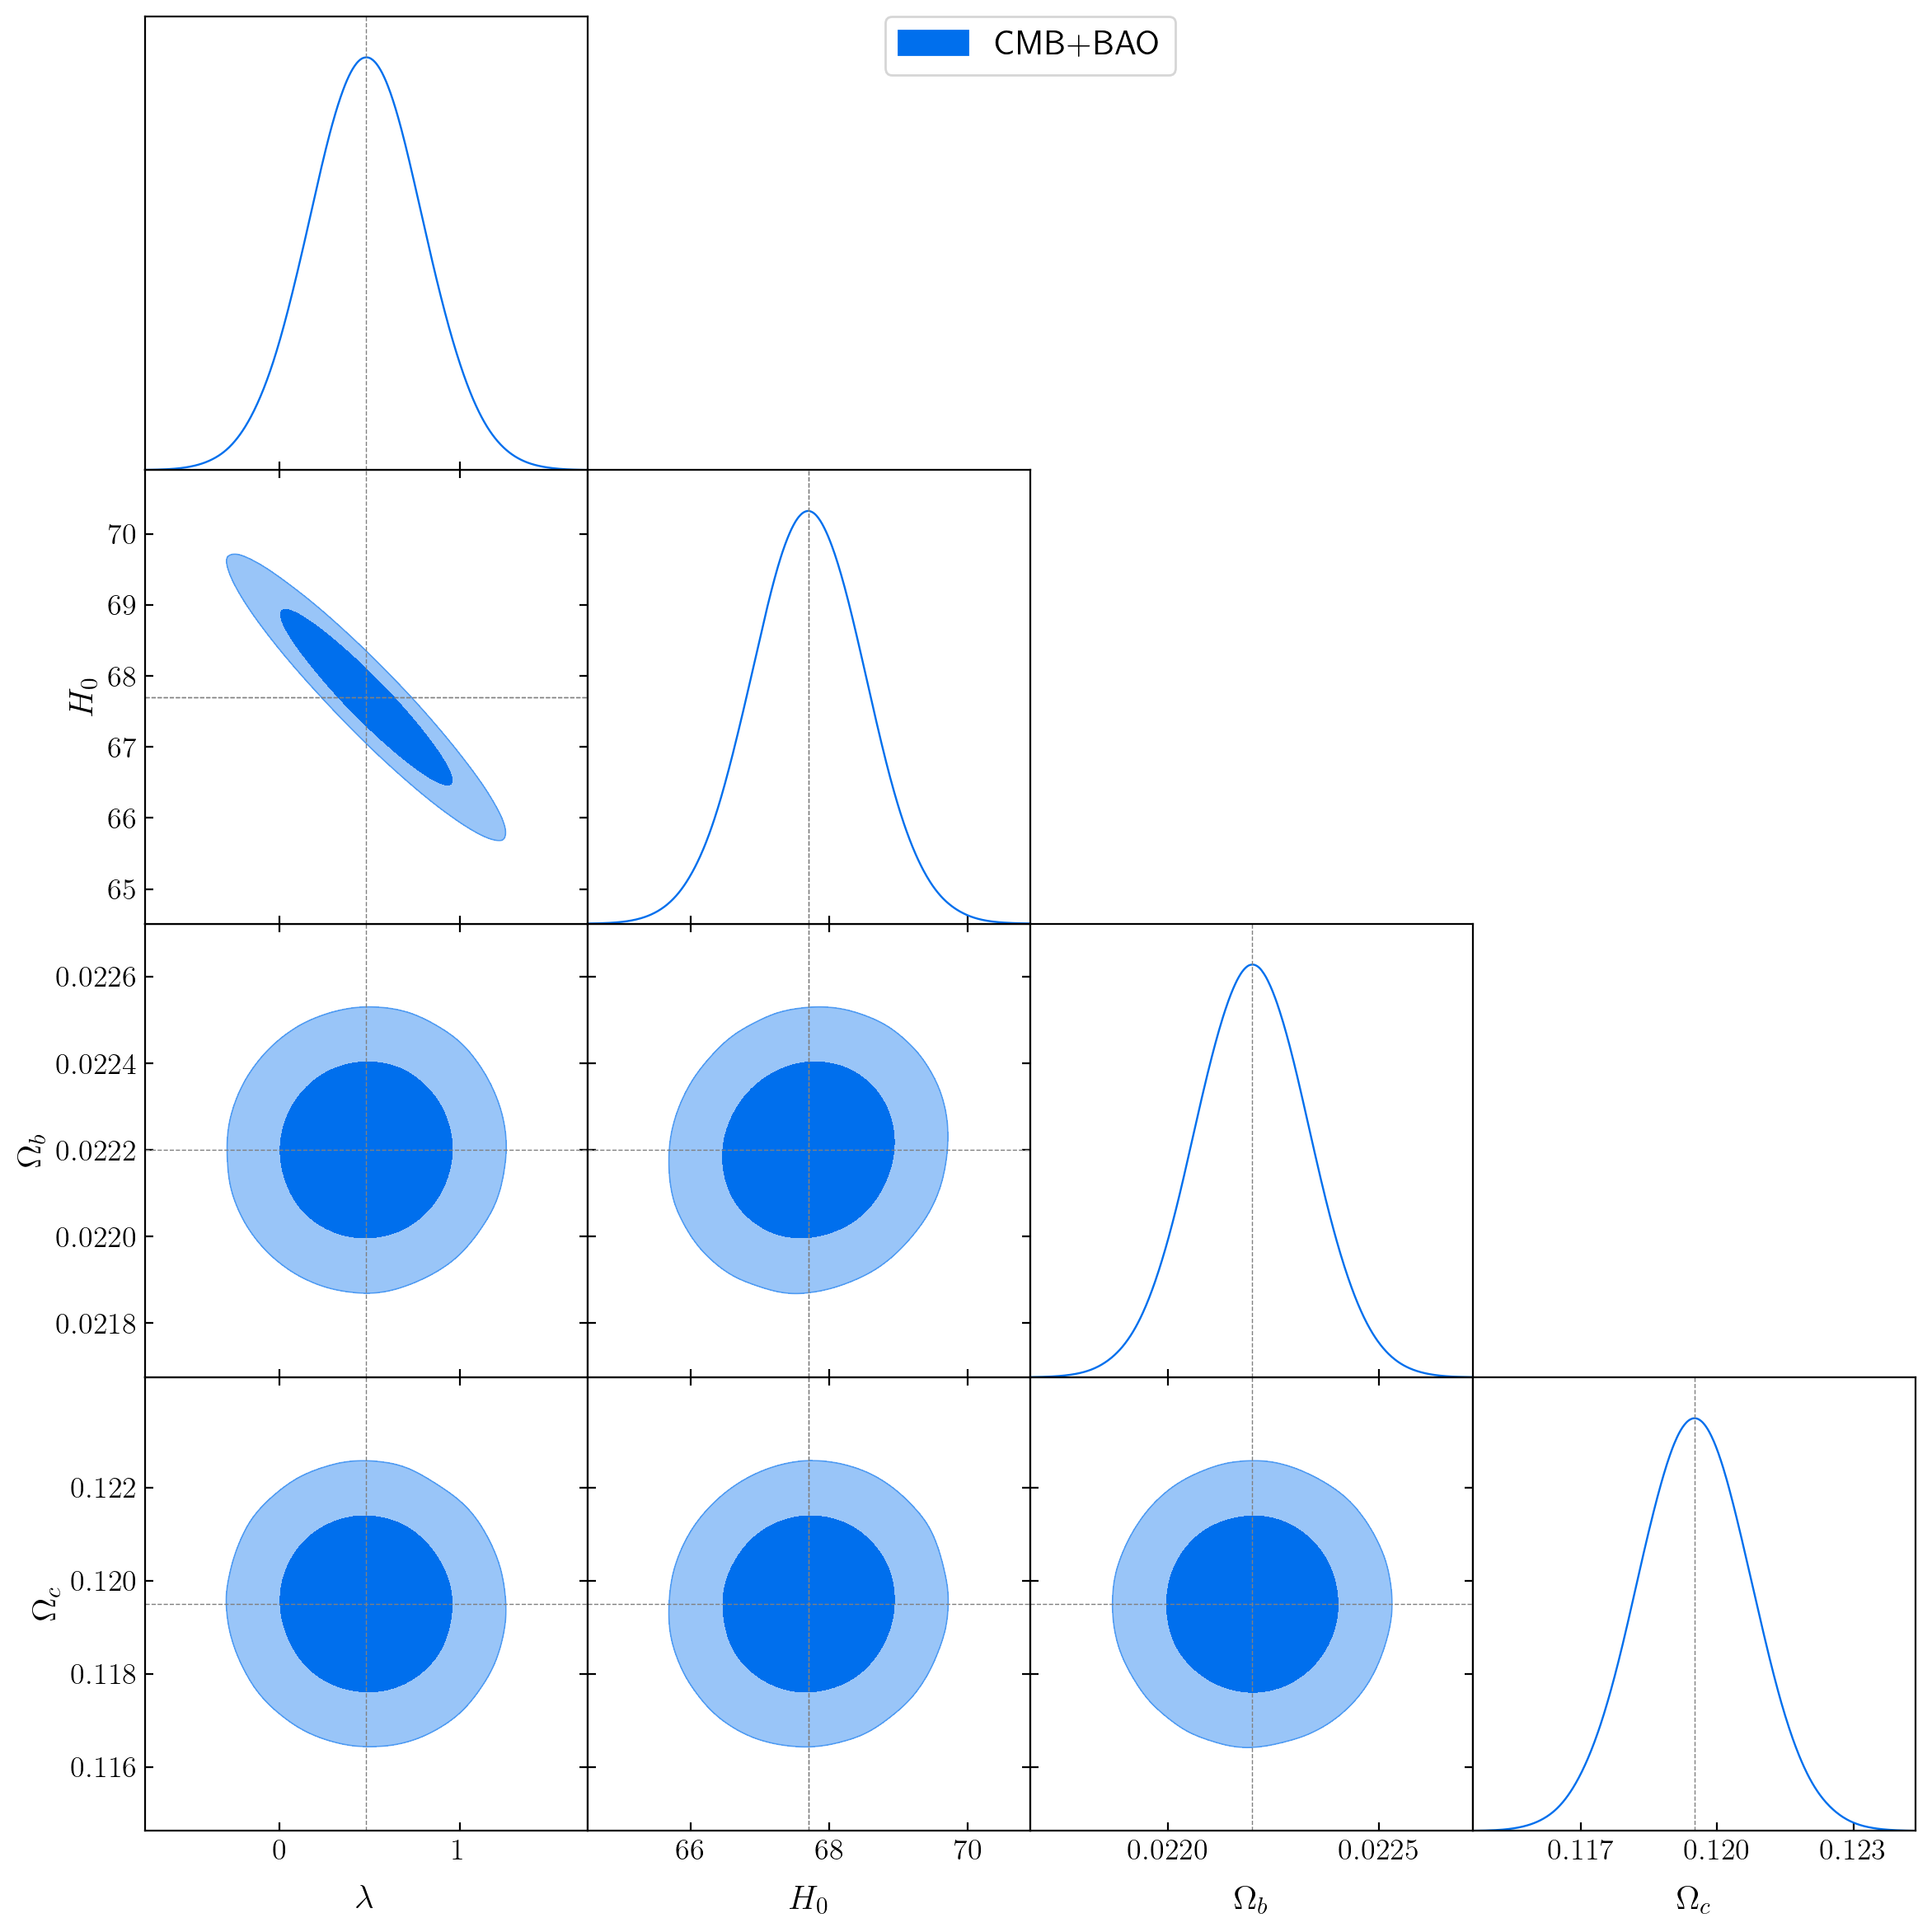

In [ ]:
g = plots.get_subplot_plotter(subplot_size=3)
g.settings.axes_fontsize=14
g.settings.legend_fontsize=16
g.settings.axes_labelsize=16
g.triangle_plot([samples_CMB_BAO ],filled=True, markers={r'\lambda':mean[0],r'H_0':mean[1],r'\Omega_b':mean[2],r'\Omega_c':mean[3]}, legend_labels=['CMB+BAO'])
markers={'lambda':mean[0],'H_0':mean[1],'Omega_b':mean[2],'Omega_c':mean[3]}
g.add_param_markers(markers)

$\lambda$=0

In [ ]:
pars = camb.set_params(ombh2=0.0222, omch2=0.1195,  omk=0.0023,
                   n=0.0, adj_om = True, V0= 1e-8,
                   dark_energy_model='EarlyQuintessenceAS', H0=67.7)
results = camb.get_results(pars);
zn = [0.65,0.75,0.85,0.95,1.05,1.15,1.25,1.35,1.45,1.55,1.65,1.75,1.85,1.95,2.05]
zn = np.array(zn)
s_DA = [0.0123, 0.0083, 0.0074, 0.0071, 0.007, 0.007, 0.007, 0.0073, 0.0078, 0.0087, 0.0101, 0.0123,
        0.0161, 0.0232, 0.0532]
s_DA = np.array(s_DA)
s_H = [0.0189, 0.0142, 0.0127, 0.0119, 0.0114, 0.0112, 0.0110, 0.0111, 0.0116, 
       0.0124, 0.0140, 0.0164, 0.0207, 0.0290, 0.0639]
s_H = np.array(s_H)
rs = results.sound_horizon(1100)
DA =results.angular_diameter_distance(zn)
h = results.h_of_z(zn)
sH = s_H*h*rs
sDA = s_DA*DA/rs
dV_rs = ((zn*(1+zn)**2*(DA/rs)**2)/(h*rs))**(1/3)
fn = dV_rs**(-1) 
s_fn = np.sqrt((-2/(3*DA/rs*dV_rs)*sDA)**2+(1/(3*h*rs*dV_rs)*sH)**2)
print(s_fn)

[0.00065476 0.00041531 0.00033995 0.00030014 0.00027472 0.00025843
 0.0002448  0.00024191 0.00024716 0.00026289 0.00029366 0.00034405
 0.00043495 0.00060839 0.001353  ]


In [ ]:
steps = [0.001, 0.01, 0.0008, 0.003]
params = [0.0, 67.7, 0.0222, 0.1195]

In [ ]:
ders_lambda = der_lambda(zn, params[0], steps[0])
ders_lambda = np.array(ders_lambda)
ders_H0 = der_H0(zn, params[1], steps[1])
ders_H0 = np.array(ders_H0)
ders_omegab = der_omegab(zn, params[2], steps[2])
ders_omegab = np.array(ders_omegab)
ders_omegac = der_omegac(zn, params[3], steps[3])
ders_omegac = np.array(ders_omegac)
ders = np.stack((ders_lambda, ders_H0, ders_omegab, ders_omegac))
F_BAO = np.zeros((len(ders), len(ders)))
for i in range(len(ders)):
    for j in range(len(ders)):
        F_BAO[i,j] = np.sum(1/(s_fn**2)*ders[i]*ders[j])

In [ ]:
nsamp  = int(1e6)
names  = ['lambda','H_0','Omega_b','Omega_c']

labels = [r'\lambda',r'H_0',r'\Omega_b',r'\Omega_c']

mean  = np.array((0.0, 67.7, 0.0222, 0.1195))

covm_CMB_BAO = np.linalg.inv((F_BAO+F_CMB))
samps_CMB_BAO  = np.random.multivariate_normal(mean , covm_CMB_BAO , size=nsamp )
samples_CMB_BAO  = MCSamples(samples=samps_CMB_BAO, names =names, labels=labels, label='BAO')
print([samples_CMB_BAO.getInlineLatex(name,limit=1) for name in names])

Removed no burn in
['\\lambda = 0.00\\pm 0.34', 'H_0 = 67.70\\pm 0.26', '\\Omega_b = 0.02220\\pm 0.00013', '\\Omega_c = 0.1195\\pm 0.0013']


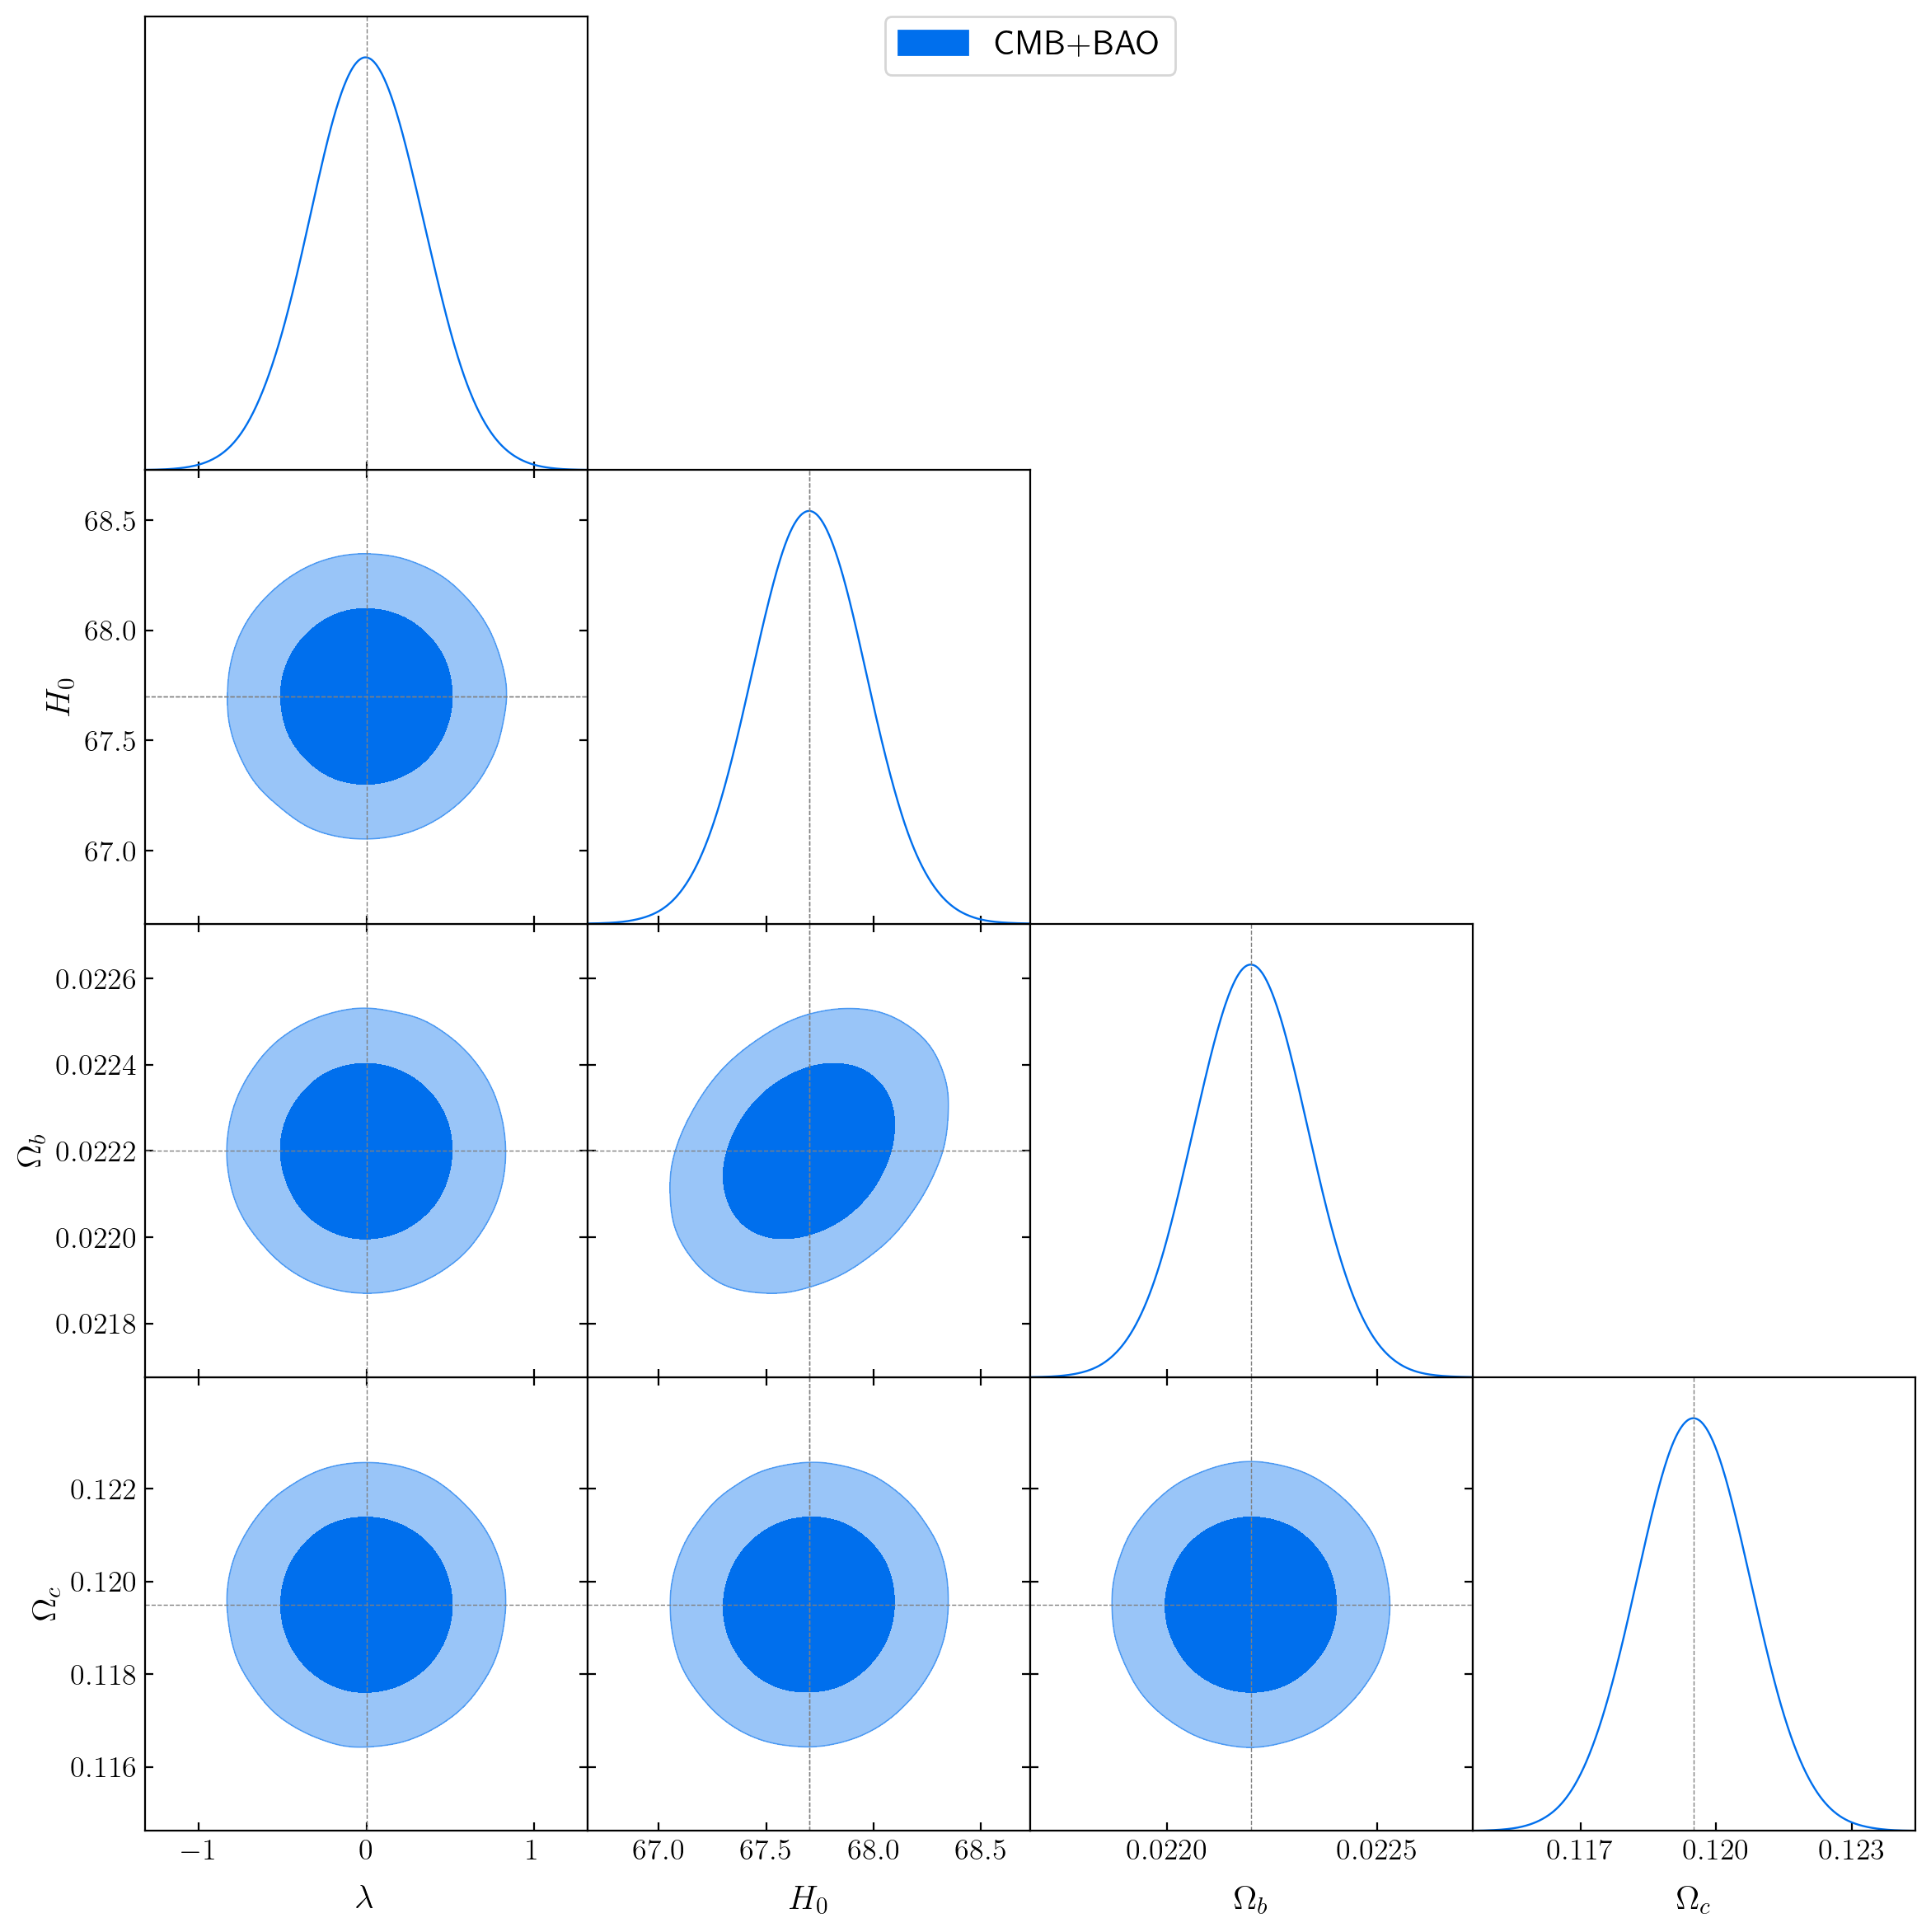

In [ ]:
g = plots.get_subplot_plotter(subplot_size=3)
g.settings.axes_fontsize=14
g.settings.legend_fontsize=16
g.settings.axes_labelsize=16
g.triangle_plot([samples_CMB_BAO ],filled=True, markers={r'\lambda':mean[0],r'H_0':mean[1],r'\Omega_b':mean[2],r'\Omega_c':mean[3]}, legend_labels=['CMB+BAO'])
markers={'lambda':mean[0],'H_0':mean[1],'Omega_b':mean[2],'Omega_c':mean[3]}
g.add_param_markers(markers)